In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [74]:
csv_file_path = './weather_data.csv'
df=pd.read_csv(csv_file_path)

## Data Preprocessing

In [75]:

df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})

/tmp/ipykernel_2172/3404451146.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})


In [76]:
empty_values_per_column=df.isna().sum()
empty_values_per_column

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [77]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
count,296.000000,296.000000,296.000000,311.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,0.636656,49.834827,1001.059119
std,6.802475,19.220133,5.344683,0.481738,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.000000,0.321826,951.240404
25%,20.265692,34.280826,3.550354,0.000000,24.530951,975.757545
50%,27.177958,56.759806,7.326421,1.000000,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,1.000000,76.046506,1026.578884
max,35.000000,90.000000,56.636041,1.000000,99.834751,1049.543752


In [78]:
# df=df.dropna()
# df.count()

# Calculate median for each column, excluding non-numeric columns like 'Date'
median_values = df.drop(columns='date').mean()

# Fill missing values in each column with its respective median
df.fillna(median_values, inplace=True)

In [79]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,25.983840,55.041385,7.556636,0.636656,49.834827,1001.059119
std,6.635859,18.749365,5.213773,0.481738,28.298916,28.835595
min,15.000000,30.000000,0.069480,0.000000,0.321826,951.240404
25%,20.493383,35.686194,3.711684,0.000000,25.955498,975.757545
50%,25.983840,55.041385,7.556636,1.000000,49.834827,1001.938586
75%,31.858688,71.978037,10.897166,1.000000,74.162107,1026.578884
max,35.000000,90.000000,56.636041,1.000000,99.834751,1049.543752


In [80]:
data = df['avg_wind_speed']
df1 = pd.DataFrame(data)

max_index = df1['avg_wind_speed'].idxmax()

mean_wind_speed = df1.loc[df.index != max_index, 'avg_wind_speed'].mean()

df.loc[max_index, 'avg_wind_speed'] = mean_wind_speed

print(df)

           date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0    2023-01-01        23.745401  46.140905        7.845981            1   
1    2023-01-02        30.030503  59.876587        5.382457            1   
2    2023-01-03        28.365224  51.464618       13.158008            1   
3    2023-01-04        27.550929  53.103799        5.886677            1   
4    2023-01-05        23.639303  57.826186       12.248992            1   
..          ...              ...        ...             ...          ...   
306  2023-11-03        22.072834  37.756910        4.729355            0   
307  2023-11-04        19.645885  42.190604        8.092369            0   
308  2023-11-05        23.884496  36.205508       11.860847            1   
309  2023-11-06        18.168418  34.785000        4.781288            0   
310  2023-11-07        19.389714  37.717416        9.388371            0   

     cloud_cover     pressure  
0      20.851051   992.965681  
1      93.059521  1037.

In [81]:
# df["date"] = pd.to_datetime(df["date"]) 
# df["month"] = df["date"].dt.month 
# df["day"] = df["date"].dt.day

In [82]:
df=df.drop(columns=["date"])

In [83]:
df

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,23.639303,57.826186,12.248992,1,38.062329,1030.264331
...,...,...,...,...,...,...
306,22.072834,37.756910,4.729355,0,27.307081,954.564875
307,19.645885,42.190604,8.092369,0,51.807877,964.002410
308,23.884496,36.205508,11.860847,1,29.872557,977.681431
309,18.168418,34.785000,4.781288,0,94.067925,1047.153269


## Model Creation 

In [84]:
X = df.drop(columns=["rain_or_not"])
y = df["rain_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Random Forest

In [85]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.45      0.44      0.45        34
           1       0.69      0.70      0.69        60

    accuracy                           0.61        94
   macro avg       0.57      0.57      0.57        94
weighted avg       0.60      0.61      0.61        94



### Logistic Regression

In [86]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        34
           1       0.70      0.77      0.73        60

    accuracy                           0.64        94
   macro avg       0.60      0.59      0.59        94
weighted avg       0.63      0.64      0.63        94



### Decision Trees

In [87]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.42      0.38      0.40        34
           1       0.67      0.70      0.68        60

    accuracy                           0.59        94
   macro avg       0.54      0.54      0.54        94
weighted avg       0.58      0.59      0.58        94



### XGBoost

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(n_estimators=50, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Gradient Boosting (XGBoost) Performance:\n", classification_report(y_test, y_pred_xgb))

Gradient Boosting (XGBoost) Performance:
               precision    recall  f1-score   support

           0       0.40      0.35      0.38        34
           1       0.66      0.70      0.68        60

    accuracy                           0.57        94
   macro avg       0.53      0.53      0.53        94
weighted avg       0.56      0.57      0.57        94



## Feature Importance (Using Random Forest)

Check which features are most important for rain prediction

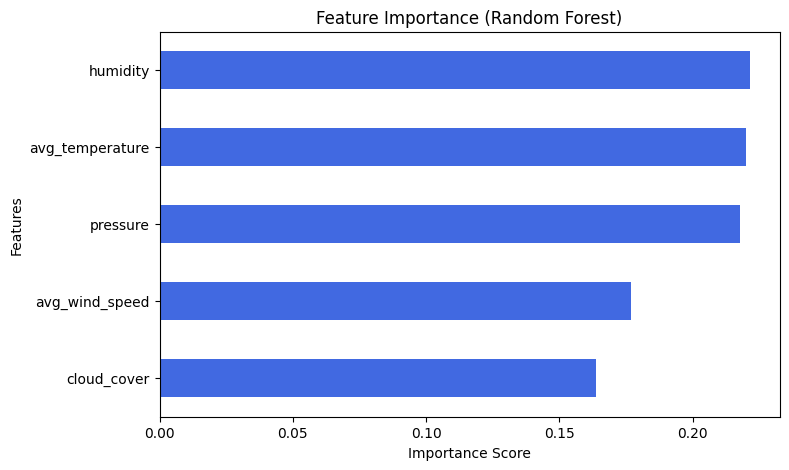

In [89]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind="barh", figsize=(8, 5), color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [90]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Print accuracy comparison
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.6383
Decision Tree: 0.5851
Random Forest: 0.6064
XGBoost: 0.5745
